___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


In [5]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

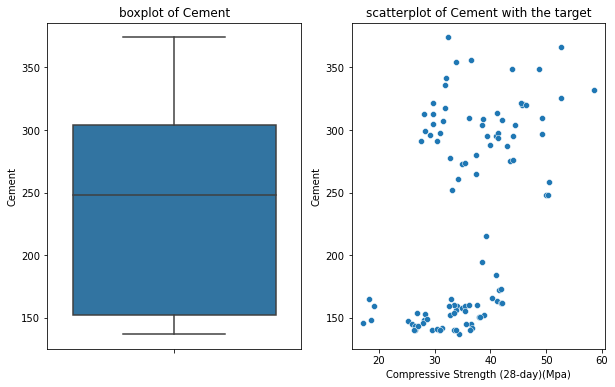

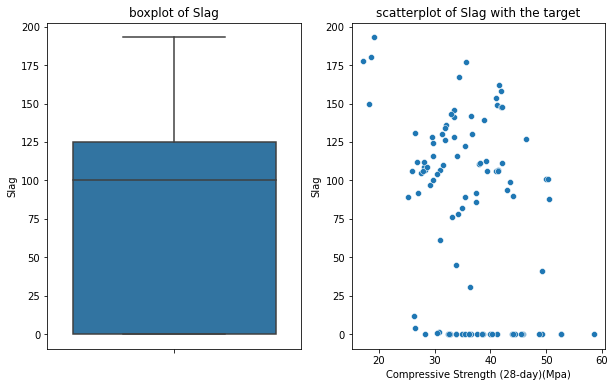

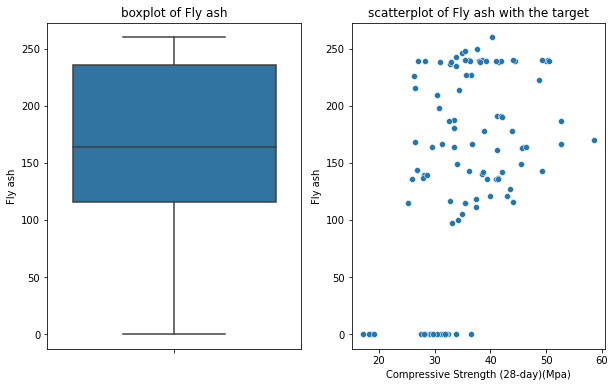

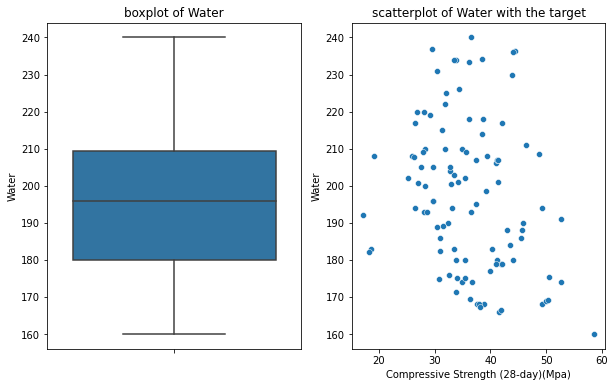

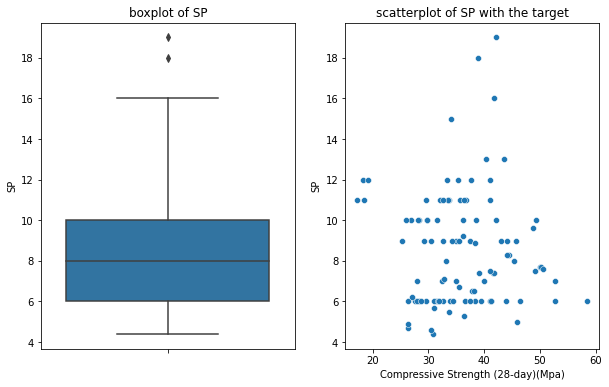

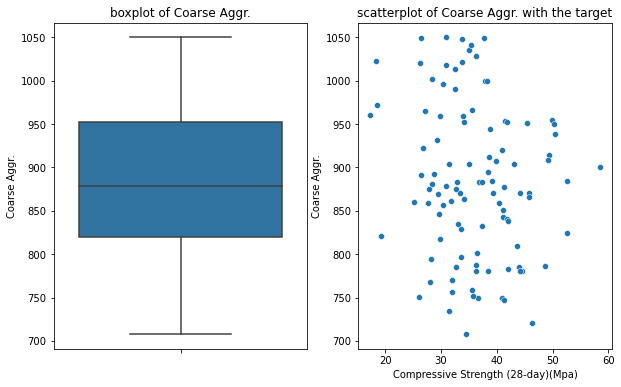

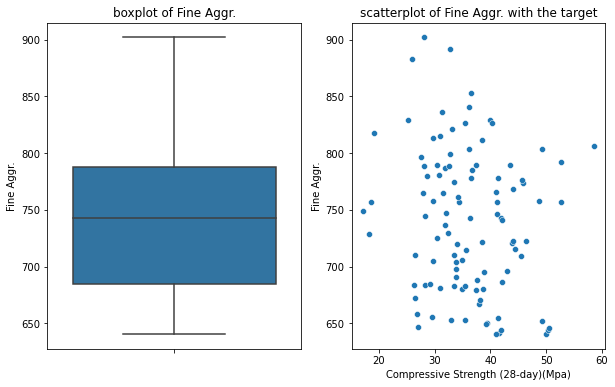

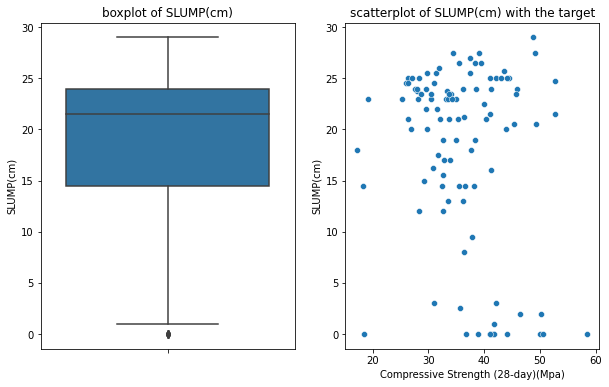

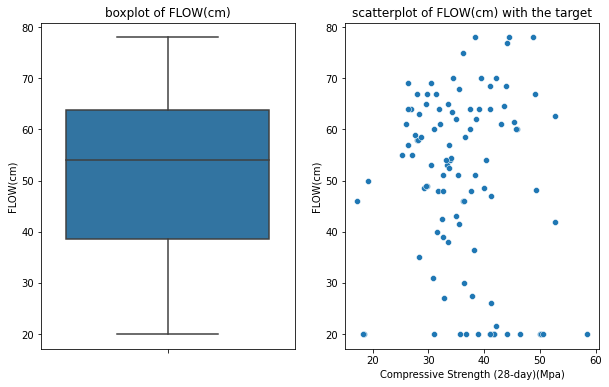

In [6]:
for i in df.drop("Compressive Strength (28-day)(Mpa)", axis=1).columns:
    fig, ax =plt.subplots(1,2)
    sns.boxplot(data=df, y=i, ax=ax[0]).set(title=f"boxplot of {i}")
    sns.scatterplot(data=df, x="Compressive Strength (28-day)(Mpa)", 
                    y=i, ax=ax[1]).set(title=f"scatterplot of {i} with the target");

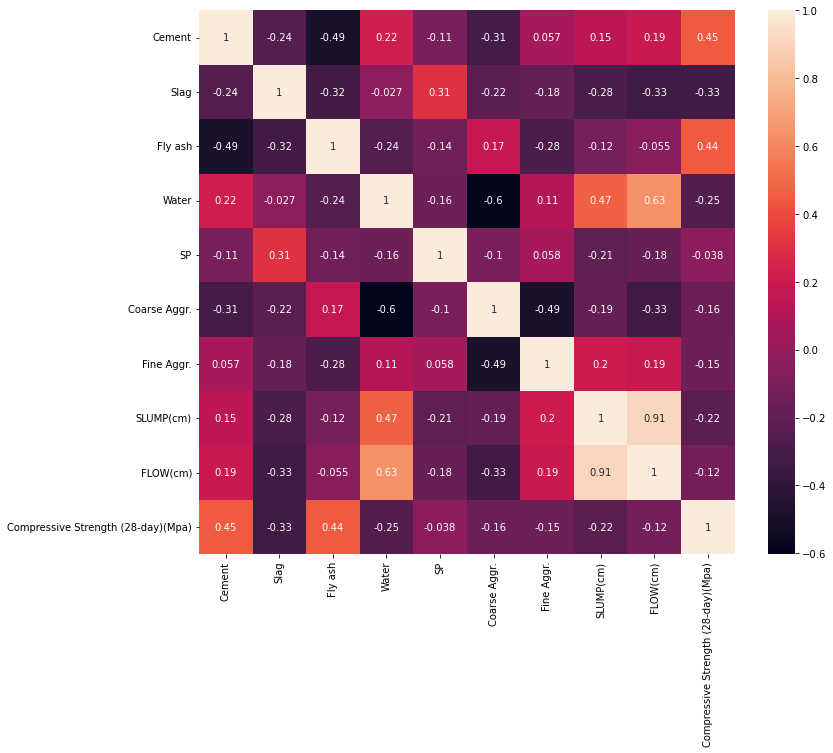

In [7]:
plt.figure(figsize= (12, 10))
sns.heatmap(df.corr(), annot=True); # check for multicolinarity; flow and slump have 0.91 corr


In [8]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.446
Slag                                 -0.332
Fly ash                               0.444
Water                                -0.254
SP                                   -0.038
Coarse Aggr.                         -0.161
Fine Aggr.                           -0.155
SLUMP(cm)                            -0.223
FLOW(cm)                             -0.124
Compressive Strength (28-day)(Mpa)    1.000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<Figure size 1152x1152 with 0 Axes>

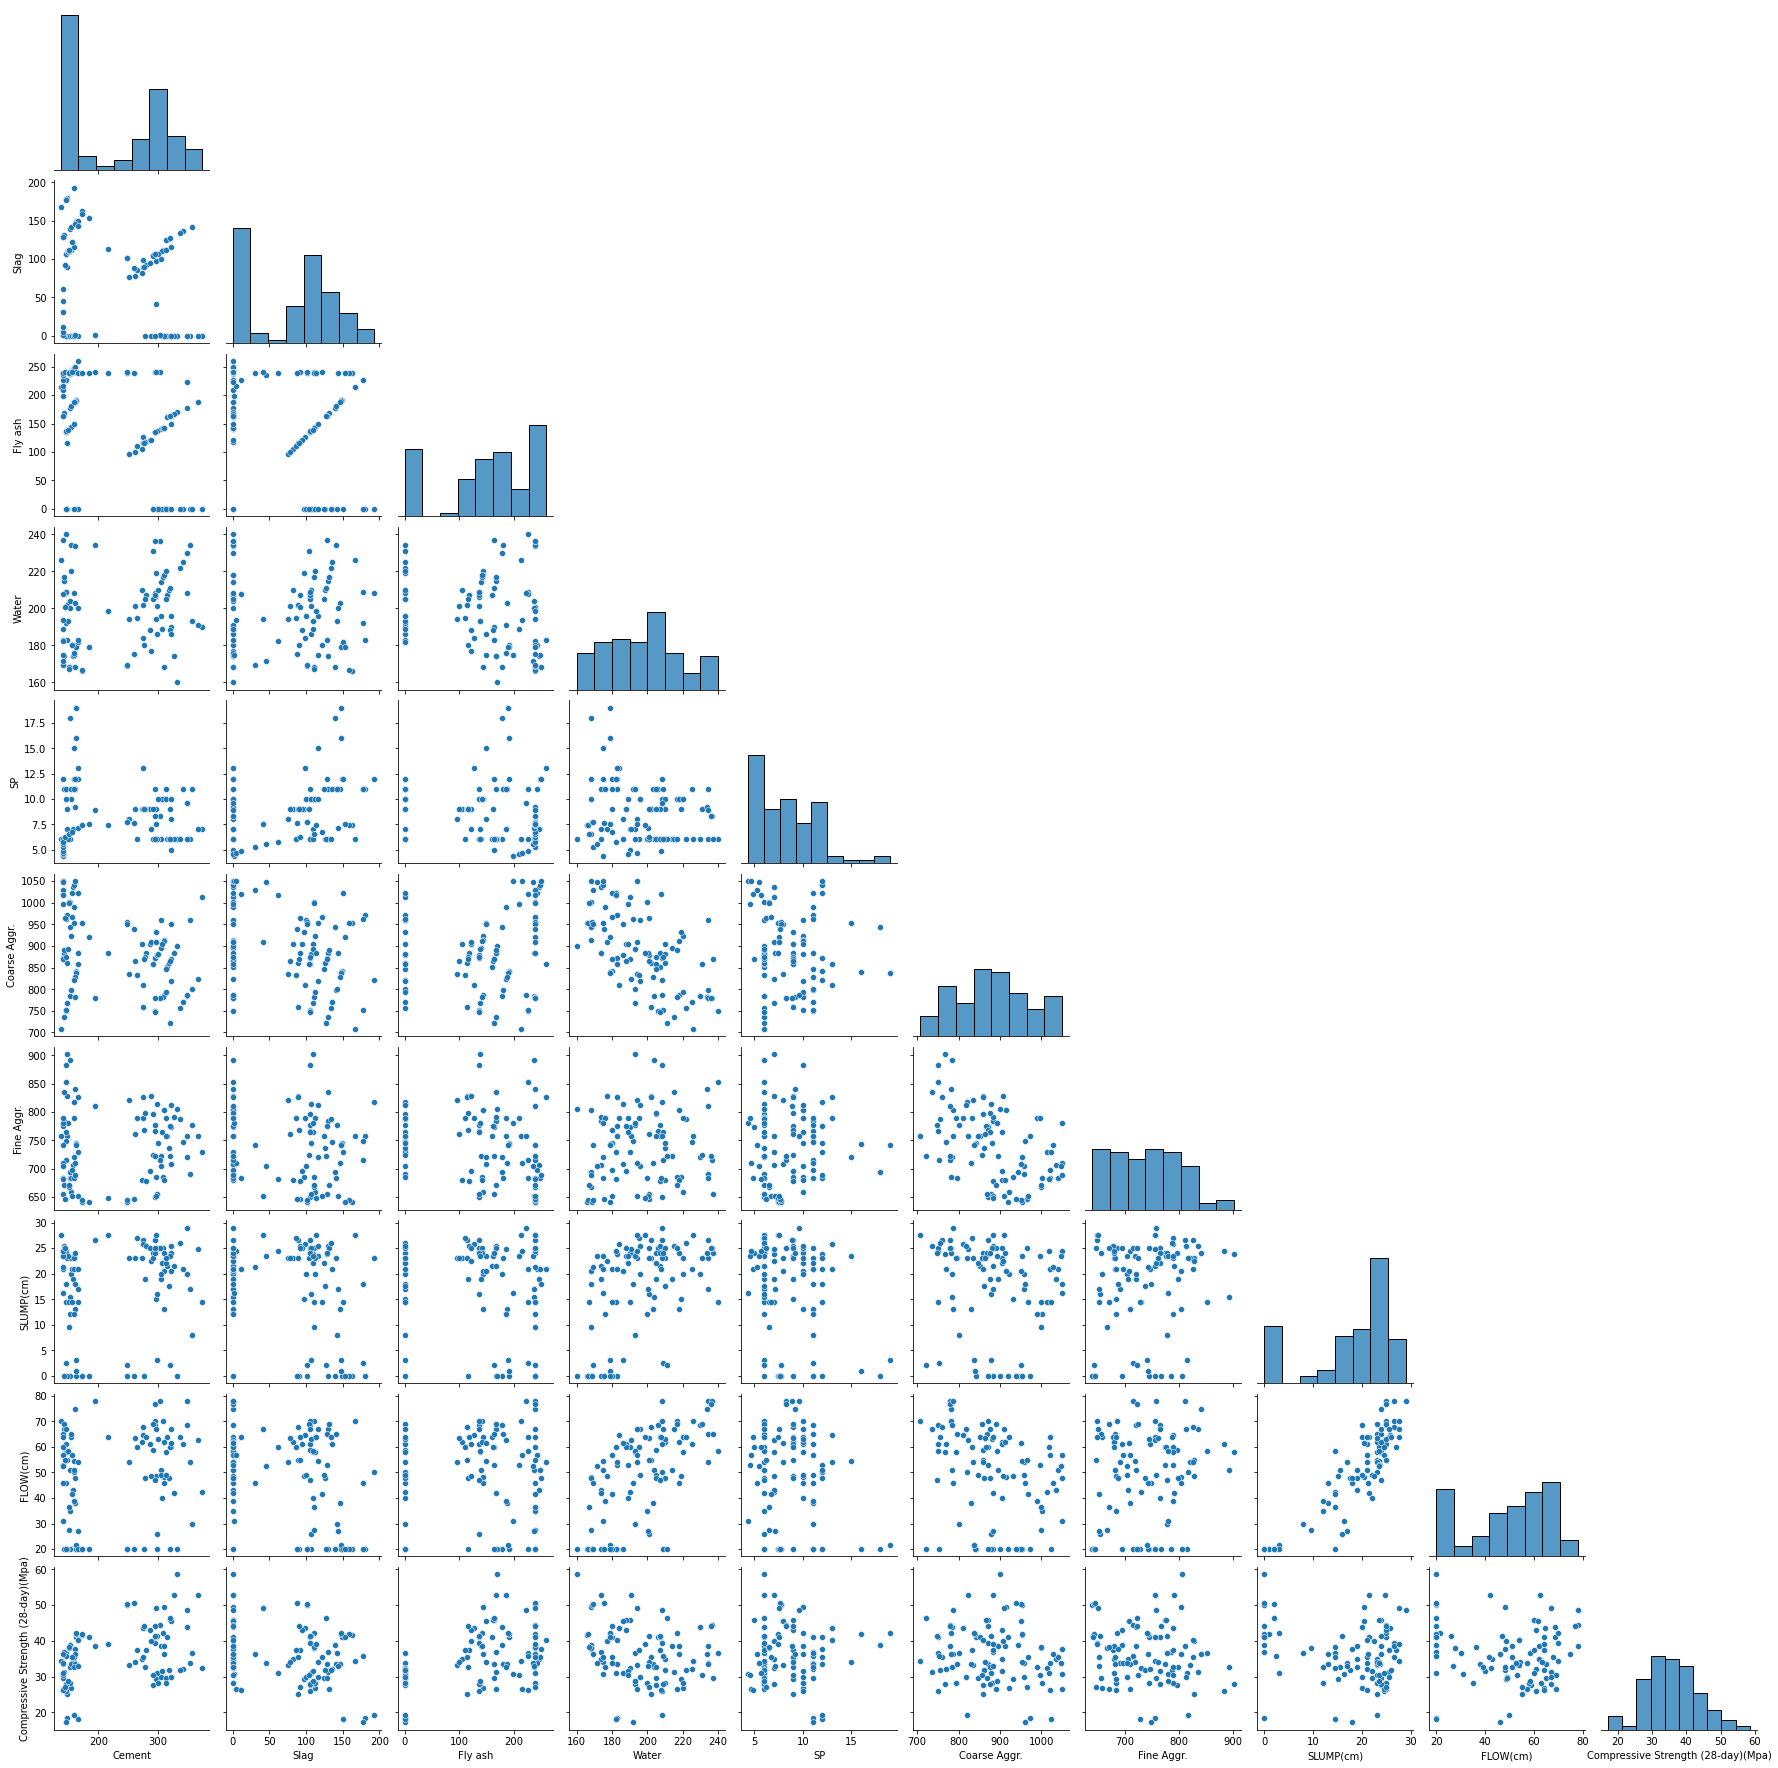

In [12]:
plt.figure(figsize=(16,16))
sns.pairplot(data=df, corner=True);

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
X.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000


In [10]:
y.head()

0   34.990
1   41.140
2   41.810
3   42.080
4   26.820
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Splitting data into training and testing
* Split the data into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
84,140.200,44.800,234.900,171.300,5.500,1047.600,704.000,23.500,52.500
57,313.000,124.000,0.000,205.000,11.000,846.000,758.000,22.000,49.000
48,332.000,0.000,170.000,160.000,6.000,900.000,806.000,0.000,20.000
47,287.000,94.000,121.000,188.000,9.000,904.000,696.000,25.000,61.000
...,...,...,...,...,...,...,...,...,...
63,291.000,104.000,0.000,231.000,9.000,857.000,725.000,23.000,69.000
70,276.000,90.000,116.000,180.000,9.000,870.000,768.000,0.000,20.000
81,140.100,11.800,226.100,207.800,4.900,1020.900,683.800,21.000,64.000
11,148.000,109.000,139.000,193.000,7.000,768.000,902.000,23.750,58.000


In [14]:
y_train

3    42.080
84   33.780
57   29.630
48   58.530
47   43.010
      ...  
63   30.430
70   44.080
81   26.280
11   28.030
95   41.010
Name: Compressive Strength (28-day)(Mpa), Length: 82, dtype: float64

## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test_scaled)
y_pred

array([17.57360595, 39.29966101, 32.59175303, 28.71657831, 46.93849714,
       39.85549958, 32.94191831, 39.93694834, 37.45295306, 52.53771776,
       37.66435134, 30.80097645, 28.74535204, 34.53205543, 46.43443742,
       48.12299522, 46.09472302, 36.65824007, 30.70361368, 34.25045651,
       43.50010209])

### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [23]:
model.coef_

array([ 4.68636583, -2.18365588,  3.95370981, -3.92587872,  0.09419853,
       -4.38842798, -2.45615494, -2.24029368,  1.28522765])

### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [26]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8656445831399762
MAE 		: 2.214172905420828
MSE 		: 8.35883348178658
RMSE 		: 2.8911647275426176


In [27]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
                              "mae" : mean_absolute_error(y_train, y_train_pred),
                              "mse" : mean_squared_error(y_train, y_train_pred),                          
                              "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
                          "mae" : mean_absolute_error(y_test, y_pred),
                          "mse" : mean_squared_error(y_test, y_pred),
                          "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [28]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [29]:
lm = train_val(y_train, y_train_pred, y_test, y_pred, "liner")
lm

,liner_train,liner_test
R2,0.911,0.866
mae,1.925,2.214
mse,5.356,8.359
rmse,2.314,2.891


# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_model = Ridge(alpha=1, random_state=42) # alpha=1 is default

In [32]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [33]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [34]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.911,0.864
mae,1.906,2.222
mse,5.394,8.458
rmse,2.323,2.908


In [35]:
pd.concat([lm, rs], axis=1)

,liner_train,liner_test,ridge_train,ridge_test
R2,0.911,0.866,0.911,0.864
mae,1.925,2.214,1.906,2.222
mse,5.356,8.359,5.394,8.458
rmse,2.314,2.891,2.323,2.908


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso_model = Lasso(alpha=1, random_state=42)

In [38]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [39]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [40]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.796,0.723
mae,2.808,3.420
mse,12.335,17.224
rmse,3.512,4.150


In [41]:
pd.concat([lm, rs, lss], axis=1)

,liner_train,liner_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.911,0.866,0.911,0.864,0.796,0.723
mae,1.925,2.214,1.906,2.222,2.808,3.420
mse,5.356,8.359,5.394,8.458,12.335,17.224
rmse,2.314,2.891,2.323,2.908,3.512,4.150


# 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) 
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [44]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [45]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
ecs

,elastic_train,elastic_test
R2,0.655,0.596
mae,3.691,4.145
mse,20.836,25.154
rmse,4.565,5.015


In [46]:
pd.concat([lm, rs, lss, ecs], axis=1)

,liner_train,liner_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,0.911,0.866,0.911,0.864,0.796,0.723,0.655,0.596
mae,1.925,2.214,1.906,2.222,2.808,3.420,3.691,4.145
mse,5.356,8.359,5.394,8.458,12.335,17.224,20.836,25.154
rmse,2.314,2.891,2.323,2.908,3.512,4.150,4.565,5.015


# Grid Search 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [49]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}
# param_grid = {"alpha":[0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
#            "l1_ratio":[0, 0.2, 0.4, 0.6, 0.8, 1]}

In [50]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error', cv =5, verbose =2)

In [51]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [52]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [53]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [54]:
gss = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gss

,GridSearch_train,GridSearch_test
R2,0.911,0.864
mae,1.908,2.223
mse,5.382,8.440
rmse,2.320,2.905


In [55]:
pd.concat([lm, rs, lss, ecs, gss], axis=1)

,liner_train,liner_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test,GridSearch_train,GridSearch_test
R2,0.911,0.866,0.911,0.864,0.796,0.723,0.655,0.596,0.911,0.864
mae,1.925,2.214,1.906,2.222,2.808,3.420,3.691,4.145,1.908,2.223
mse,5.356,8.359,5.394,8.458,12.335,17.224,20.836,25.154,5.382,8.440
rmse,2.314,2.891,2.323,2.908,3.512,4.150,4.565,5.015,2.320,2.905


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___